In [1]:
#!/usr/bin/python3

#import pypyodbc
#import urllib
import urllib.request as urllib
import requests
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
#import mplfinance as mpf
#import matplotlib.dates as mpdates
Interval="5"

url="https://www.alphavantage.co/query?function=FX_INTRADAY&from_symbol=GBP&to_symbol=USD&interval="+Interval+"min&outputsize=full&apikey=AANX49EZGZKYUACF&datatype=csv"
response = requests.get(url)


In [2]:
from io import BytesIO

df = pd.read_csv(BytesIO(response.content))
df_for_graph=df

In [3]:
df=df.assign(Currency= "GBPUSD")
df=df.assign(TimeFrame= Interval+"Min")



In [4]:
df[['Date', 'Time']] = df['timestamp'].str.split(' ', expand=True)

In [5]:
df.head()

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time
0,2022-11-04 13:10:00,1.12709,1.12877,1.12648,1.12844,GBPUSD,5Min,2022-11-04,13:10:00
1,2022-11-04 13:05:00,1.12670,1.12775,1.12550,1.12708,GBPUSD,5Min,2022-11-04,13:05:00
2,2022-11-04 13:00:00,1.12343,1.12749,1.12300,1.12660,GBPUSD,5Min,2022-11-04,13:00:00
3,2022-11-04 12:55:00,1.12222,1.12383,1.12217,1.12340,GBPUSD,5Min,2022-11-04,12:55:00
4,2022-11-04 12:50:00,1.12058,1.12342,1.12000,1.12226,GBPUSD,5Min,2022-11-04,12:50:00


In [6]:
df.shape[0]

1000

In [7]:
df3=df


In [8]:
df3.head(10)

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time
0,2022-11-04 13:10:00,1.12709,1.12877,1.12648,1.12844,GBPUSD,5Min,2022-11-04,13:10:00
1,2022-11-04 13:05:00,1.12670,1.12775,1.12550,1.12708,GBPUSD,5Min,2022-11-04,13:05:00
2,2022-11-04 13:00:00,1.12343,1.12749,1.12300,1.12660,GBPUSD,5Min,2022-11-04,13:00:00
3,2022-11-04 12:55:00,1.12222,1.12383,1.12217,1.12340,GBPUSD,5Min,2022-11-04,12:55:00
4,2022-11-04 12:50:00,1.12058,1.12342,1.12000,1.12226,GBPUSD,5Min,2022-11-04,12:50:00
5,2022-11-04 12:45:00,1.12071,1.12084,1.11880,1.12062,GBPUSD,5Min,2022-11-04,12:45:00
6,2022-11-04 12:40:00,1.11772,1.12240,1.11760,1.12073,GBPUSD,5Min,2022-11-04,12:40:00
7,2022-11-04 12:35:00,1.11933,1.11970,1.11422,1.11770,GBPUSD,5Min,2022-11-04,12:35:00
8,2022-11-04 12:30:00,1.11908,1.11972,1.11807,1.11907,GBPUSD,5Min,2022-11-04,12:30:00
9,2022-11-04 12:25:00,1.11945,1.11992,1.11890,1.11900,GBPUSD,5Min,2022-11-04,12:25:00


In [9]:
df3.shape[0]

1000

In [10]:
filt= df3["Date"] == datetime.now().isoformat()[0:10]
df4=df3.loc[filt]

In [11]:
datetime.now().isoformat()

'2022-11-04T13:08:34.364127'

In [12]:
datetime.now().isoformat()[0:10]

'2022-11-04'

In [13]:
df4

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time
0,2022-11-04 13:10:00,1.12709,1.12877,1.12648,1.12844,GBPUSD,5Min,2022-11-04,13:10:00
1,2022-11-04 13:05:00,1.12670,1.12775,1.12550,1.12708,GBPUSD,5Min,2022-11-04,13:05:00
2,2022-11-04 13:00:00,1.12343,1.12749,1.12300,1.12660,GBPUSD,5Min,2022-11-04,13:00:00
3,2022-11-04 12:55:00,1.12222,1.12383,1.12217,1.12340,GBPUSD,5Min,2022-11-04,12:55:00
4,2022-11-04 12:50:00,1.12058,1.12342,1.12000,1.12226,GBPUSD,5Min,2022-11-04,12:50:00
...,...,...,...,...,...,...,...,...,...
154,2022-11-04 00:20:00,1.11820,1.11842,1.11750,1.11811,GBPUSD,5Min,2022-11-04,00:20:00
155,2022-11-04 00:15:00,1.11828,1.11864,1.11783,1.11815,GBPUSD,5Min,2022-11-04,00:15:00
156,2022-11-04 00:10:00,1.11750,1.11849,1.11715,1.11828,GBPUSD,5Min,2022-11-04,00:10:00
157,2022-11-04 00:05:00,1.11698,1.11755,1.11655,1.11744,GBPUSD,5Min,2022-11-04,00:05:00


In [14]:
df4.shape[0]

159

In [15]:
#df4.set_index('Time', inplace=True)

In [16]:
df4 = df4.sort_index(axis=0 ,ascending=False)

In [17]:
df4.reset_index(inplace=True, drop=True)

In [18]:
df4

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time
0,2022-11-04 00:00:00,1.11706,1.11715,1.11667,1.11695,GBPUSD,5Min,2022-11-04,00:00:00
1,2022-11-04 00:05:00,1.11698,1.11755,1.11655,1.11744,GBPUSD,5Min,2022-11-04,00:05:00
2,2022-11-04 00:10:00,1.11750,1.11849,1.11715,1.11828,GBPUSD,5Min,2022-11-04,00:10:00
3,2022-11-04 00:15:00,1.11828,1.11864,1.11783,1.11815,GBPUSD,5Min,2022-11-04,00:15:00
4,2022-11-04 00:20:00,1.11820,1.11842,1.11750,1.11811,GBPUSD,5Min,2022-11-04,00:20:00
...,...,...,...,...,...,...,...,...,...
154,2022-11-04 12:50:00,1.12058,1.12342,1.12000,1.12226,GBPUSD,5Min,2022-11-04,12:50:00
155,2022-11-04 12:55:00,1.12222,1.12383,1.12217,1.12340,GBPUSD,5Min,2022-11-04,12:55:00
156,2022-11-04 13:00:00,1.12343,1.12749,1.12300,1.12660,GBPUSD,5Min,2022-11-04,13:00:00
157,2022-11-04 13:05:00,1.12670,1.12775,1.12550,1.12708,GBPUSD,5Min,2022-11-04,13:05:00


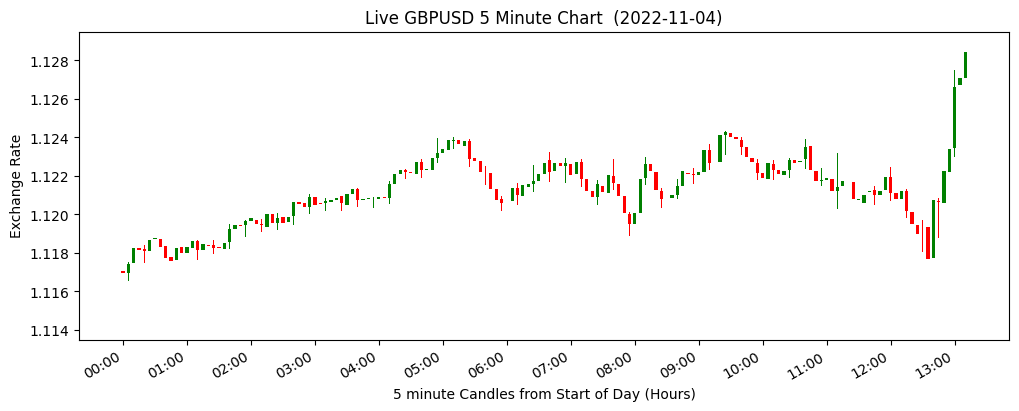

In [19]:
#plt.figure()
fig= plt.figure(figsize=(12,4))

up = df4[df4.close >= df4.open]
down = df4[df4.close < df4.open]

col1= 'green'
col2 = 'red'

# Setting width of candlestick elements
#width = .3
#width2 = .03
width = .6
width2 = .06

# Plotting up prices of the stock
plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1)
plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1)
plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1)

# Plotting down prices of the stock
plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2)
plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2)
plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2)

# rotating the x-axis tick labels at 30degree
# towards right

labels = ["00:00","01:00", "02:00", "03:00", "04:00", "05:00", "06:00", "07:00", "08:00", "09:00", "10:00", "11:00", "12:00", "13:00", "14:00", "15:00", "16:00", "17:00", "18:00", "19:00","20:00", "21:00", "22:00", "23:00"]
if (Interval == "15") : plt.xticks(np.arange(0, 96, step=4), labels, rotation=30, ha='right')
if (Interval == "5") :plt.xticks(np.arange(0, 280, step=12), labels, rotation=30, ha='right')
#plt.xticks(x, labels, rotation ='vertical')
#plt.xticks(rotation=30, ha='right')

# displaying candlestick chart of stock data
# of a week
plt.title("Live GBPUSD "+Interval+" Minute Chart  ("+ df4.Date[0]+")")
plt.xlabel(Interval+' minute Candles from Start of Day (Hours)')
plt.ylabel('Exchange Rate')

#plt.annotate("Start of Trading Session", xy=(745, 1.1405), xytext=(730, 1.15), arrowprops={"arrowstyle":"->", "color":"blue"})
#plt.annotate("News Event", xy=(795, 1.15), xytext=(780, 1.14), arrowprops={"arrowstyle":"->", "color":"blue"})
plt.plot()
#plt.savefig('1min-2.png')
plt.show()